In [702]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [703]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [704]:
os.chdir("/content/drive/My Drive/cnn/sin_char/")
os.getcwd()

'/content/drive/My Drive/cnn/sin_char'

In [705]:
X_train = np.loadtxt('train_img.csv', delimiter = ',',skiprows=1)
Y_train = np.loadtxt('train_lab.csv', delimiter = ',',skiprows=1)
X_test = np.loadtxt('test_img.csv', delimiter = ',',skiprows=1)
Y_test = np.loadtxt('test_lab.csv', delimiter = ',',skiprows=1)

In [706]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (80, 10000)
Shape of Y_train:  (80,)
Shape of X_test:  (20, 10000)
Shape of Y_test:  (20,)


In [707]:
X_train = X_train.reshape(80, 100, 100, 1)

# Reshape Y_train to (80, 1)
Y_train = Y_train.reshape(80, 1)

# Reshape X_test to (20, 100, 100, 1)
X_test = X_test.reshape(20, 100, 100, 1)

# Reshape Y_test to (20, 1)
Y_test = Y_test.reshape(20, 1)

In [ ]:
X_train[1:]

In [709]:
 X_train = X_train/255.0
 X_test = X_test/255.0

In [710]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (80, 100, 100, 1)
Shape of Y_train:  (80, 1)
Shape of X_test:  (20, 100, 100, 1)
Shape of Y_test:  (20, 1)


In [ ]:
X_train[1]

[1.]


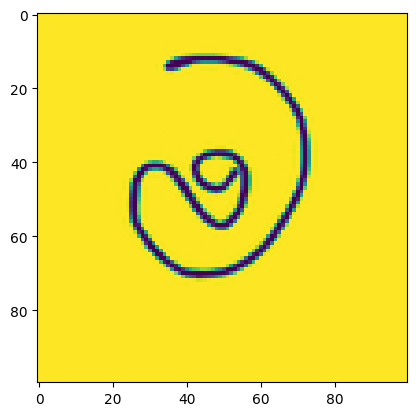

In [712]:
idx = random.randint(0, len(Y_train)-1)
plt.imshow(X_train[idx, :])
print(Y_train[idx])
plt.show()

In [1291]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics =['accuracy'])

model.fit(X_train, Y_train, epochs = 6, batch_size = 4)
model.evaluate(X_test, Y_test)

Epoch 1/6
20/20 [==============================] - 2s 61ms/step - loss: 0.7951 - accuracy: 0.4625
Epoch 2/6
20/20 [==============================] - 1s 71ms/step - loss: 0.6881 - accuracy: 0.6250
Epoch 3/6
20/20 [==============================] - 1s 70ms/step - loss: 0.6565 - accuracy: 0.6625
Epoch 4/6
20/20 [==============================] - 1s 51ms/step - loss: 0.5168 - accuracy: 0.7250
Epoch 5/6
20/20 [==============================] - 1s 43ms/step - loss: 0.2550 - accuracy: 0.9375
Epoch 6/6
1/1 [==============================] - 0s 190ms/step - loss: 0.8873 - accuracy: 0.6500


[0.8872682452201843, 0.6499999761581421]

# **The accuracy of this model is : 0.6499999761581421**
\

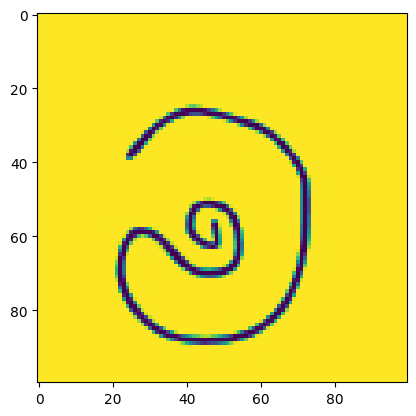

1/1 [==============================] - 0s 25ms/step
[[0.76755184]]
Our model says it is a : ma


In [1300]:
idx2 = random.randint(0, len(Y_test)-1)
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 1))

if(y_pred < 0.5):
    pred = 'mba'
else:
     pred = 'ma'
print("Our model says it is a :", pred)